<!--
Title:  COMP6714 L8 Evaluation - A Complete Example  
Author: Wei Wang  
Date:   September 21, 2015  
-->

## A Complete Example for IR Evaluation

## Packages needed

You need to install the `tabulate` package: 

`pip install tabulate`. 

### Setting

* Let the *ground truth* be $D_1, D_3, D_4$. 
* System A returns $D_1, D_2$. 
* System B returns $D_1, D_2, D_3, D_4, D_5, D_6, D_7$. 

### Questions

1. What are the precision and recall of System A? 
2. What are the precision and recall of System B? 
3. Which system is better? 
4. Draw the raw precision-recall graph.
5. Assume that Systems A and B are actually the same system ran for two different queries. Draw the 11-point interpolated precision-recall graph.
6. What is the average precision? 
7. Assume that Systems A and B are actually the same system ran for two different queries. What is the MAP?
8. What is the R-precision for System B? 


<!-- 
    Leave some space so that answers are not shown directly. 
--> 
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />















## More Detailes About the 11-point Interpolated Precision-Recall Graph

Some of the information on the Web is not entirely correct/accurate, including [this popular one](http://datamin.ubbcluj.ro/wiki/index.php/Evaluation%5Fmethods%5Fin%5Ftext%5Fcategorization#11-point%5Faverage%5Fprecision)

We present a version based on the following paper: 

> Simone Teufel. 2007. An Overview of evaluation methods in TREC Ad-hoc Information Retrieval and TREC Question Answering. In Evaluation of Text and Speech Systems. L. Dybkjaer, H. Hemsen, W. Minker (Eds.) Springer, Dordrecht (The Netherlands).

Let $r_0, r_1, r_2, \ldots, r_{10}$ be the 11 recall values at $0, 0.1, 0.2, \ldots, 1.0$, respectively. The interpolated precision of the $i$th query for the recall $r_j$ is defined as
$$
    \tilde{P}_i(r_j) = \begin{cases}
                         \max_{r_j \leq r < r_{j+1}} P_i(R = r) & \text{ , if such $r$ exists}, \\
                         \tilde{P}_i(r_{j+1})                  & \text{ , otherwise.}
                       \end{cases}
$$
Then, we can define the average interpolated precisions for each $r_j$ as 
$$
    AP_{r_j} = \frac{1}{N}\sum_{i=1}^N \tilde{P}_{i}(r_j)
$$
Finally, we can draw the $AP_{r_j}$ vs $r_j$ curve. 



**Exercises**:
1. How to calculate $\tilde{P}_i(r_{0})$?
2. How to calculate $\tilde{P}_i(r_{10})$?
3. Find an algorithm to calculate $\tilde{P}_i(r_{j})$, for $0 \leq j \leq 10$ efficiently. 

**Answers**:
1. With some reasoning about the recursive definition, we can show that $\tilde{P}_i(r_{0}=0.0) = \max_{r \in \mathcal{R}} P_i(R=r)$, where $\mathcal{R}$ are recall values actually obtained (in other words, if there are $L$ relevant documents in the ground truth, $\mathcal{R} = \{0, \frac{1}{L}, \frac{2}{L}, \ldots, 1\}$. 

2. In theory, $\tilde{P}_i(r_{10}=1.0)$ should always be measured. If not in practice, we use the default value of 0.  

3. Firstly, since we only care about the maximum precision value at the same recall value, we only need to measure raw precision and recall values at the position where a relevant document is retrieved. Secondly, by the recursive nature of the definition, we should compute $\tilde{P}_i(r_{j})$ in the decreasing order of $r_j$. The pseudocode is shown below:

```
// assume two arrays, P[k] and R[k], hold recorded precision and recall values, 
// in the increasing order of recalls
INTERP_R[10] = R[-1]
FOR j = 9 DOWNTO 0 DO
    Let S be the set of k such that R[k] >= (j-1)/10
    maxP = max( R[j+1], max_{k \in S}(P[k]) )
ENDFOR
```

### Answers

**Answer 1**: Prec(A) = 1/2; Recall(A) = 1/3

**Answer 2**: Prec(B) = 3/7; Recall(B) = 3/3

**Answer 3**: F1(A) = 2/5; F1(B) = 3/5

**Answer 4**: See the table below. We highlight the rows where a relevant document is retrieved.  

<div class="tableblock">
<table rules="all" frame="border" cellpadding="4" cellspacing="0" width="100%">
<colgroup><col width="14%">
<col width="14%">
<col width="14%">
<col width="14%">
<col width="14%">
<col width="14%">
<col width="14%">
</colgroup><tbody>
<tr>
<td align="left" valign="top"><p class="table"><strong>k-th Output</strong></p></td>
<td align="left" valign="top"><p class="table">Judgement</p></td>
<td align="left" valign="top"><p class="table"><strong>Prec @ k (A)</strong></p></td>
<td align="left" valign="top"><p class="table"><strong>Recall @ k (A)</strong></p></td>
<td align="left" valign="top"><p class="table">Judgement</p></td>
<td align="left" valign="top"><p class="table"><strong>Prec @ k (B)</strong></p></td>
<td align="left" valign="top"><p class="table"><strong>Recall @ k (B)</strong></p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">1</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">R</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00" ><p class="table">1/1</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">1/3</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">R</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">1/1</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">1/3</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">2</p></td>
<td align="left" valign="top"><p class="table">N</p></td>
<td align="left" valign="top"><p class="table">1/2</p></td>
<td align="left" valign="top"><p class="table">1/3</p></td>
<td align="left" valign="top"><p class="table">N</p></td>
<td align="left" valign="top"><p class="table">1/2</p></td>
<td align="left" valign="top"><p class="table">1/3</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">3</p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">R</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">2/3</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">2/3</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">4</p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">R</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">3/4</p></td>
<td align="left" valign="top" BGCOLOR="#ffff00"><p class="table">3/3</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">5</p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table">N</p></td>
<td align="left" valign="top"><p class="table">3/5</p></td>
<td align="left" valign="top"><p class="table">3/3</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">6</p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table">N</p></td>
<td align="left" valign="top"><p class="table">3/6</p></td>
<td align="left" valign="top"><p class="table">3/3</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">7</p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table"></p></td>
<td align="left" valign="top"><p class="table">N</p></td>
<td align="left" valign="top"><p class="table">3/7</p></td>
<td align="left" valign="top"><p class="table">3/3</p></td>
</tr>
</tbody>
</table>
</div>

We show the resulting figure for System B below. 



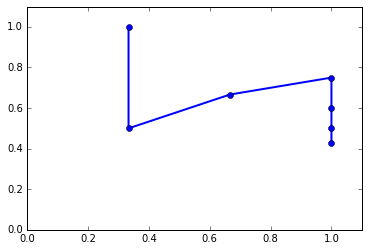

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

B_raw_recalls    = np.array([1/3, 1/3, 2/3, 3/3, 3/3, 3/3, 3/3])
B_raw_precisions = np.array([1/1, 1/2, 2/3, 3/4, 3/5, 3/6, 3/7])

plt.xlim(0, 1.1) 
plt.ylim(0, 1.1)

line, = plt.plot(B_raw_recalls, B_raw_precisions, 'o-', linewidth=2)
plt.show()

**Answer 5**: Perform the interpolation on precisions and we have the table below. 

<div class="tableblock">
<table rules="all" frame="border" cellpadding="4" cellspacing="0" width="100%">
<colgroup>
<col width="14%">
<col width="28%">
<col width="28%">
<col width="28%">
</colgroup><tbody>
<tr>
<td align="left" valign="top"><p class="table"><strong>r_j</strong></p></td>
<td align="left" valign="top"><p class="table"><strong>Interp. Prec (A)</strong></p></td>
<td align="left" valign="top"><p class="table"><strong>Interp. Prec (B)</strong></p></td>
<td align="left" valign="top"><p class="table"><strong>Avg. Interp. Prec (B)</strong></p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.0</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1.0</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.1</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1.0</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.2</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1.0</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.3</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1/1</p></td>
<td align="left" valign="top"><p class="table">1.0</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.4</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.5</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.6</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.7</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.8</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">0.9</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
<tr>
<td align="left" valign="top"><p class="table">1.0</p></td>
<td align="left" valign="top"><p class="table">0</p></td>
<td align="left" valign="top"><p class="table">3/4</p></td>
<td align="left" valign="top"><p class="table">0.375</p></td>
</tr>
</tbody>
</table>
</div>


We obtain the above by 3 steps. 

*Step 1*: We perform the 11-point interpolation for precisions for System B, as follows. 





  Recall    Raw Precision
--------  ---------------
0.333333         1
0.333333         0.5
0.666667         0.666667
1                0.75
1                0.6
1                0.5
1                0.428571

  Recall    Interp. Precision
--------  -------------------
     0                   1
     0.1                 1
     0.2                 1
     0.3                 1
     0.4                 0.75
     0.5                 0.75
     0.6                 0.75
     0.7                 0.75
     0.8                 0.75
     0.9                 0.75
     1                   0.75



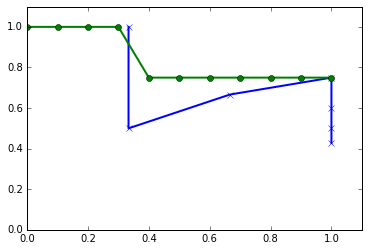

In [2]:
from tabulate import tabulate # c.f., https://pypi.python.org/pypi/tabulate
from math import *

def eleven_point_interpolated_precisions(sorted_raw_precisions, sorted_raw_recalls):
    # Detailed instructions to calculate the 11-point interpolated precisions are available at 
    # https://ccc.inaoep.mx/~villasen/bib/AN%20OVERVIEW%20OF%20EVALUATION%20METHODS%20IN%20TREC%20AD%20HOC%20IR%20AND%20TREC%20QA.pdf
    #
    # Note that some of the descriptions online is not correct (including this widely cited one:
    # http://datamin.ubbcluj.ro/wiki/index.php/Evaluation_methods_in_text_categorization#11-point_average_precision)
    # 
    # The `sorted_raw_precisions` array is sorted by increasing corresponding recall. 
    # 
    interpolated_precisions = np.zeros(11)
    k = 0
    for j in range(11):
        current_recall = float(j) / 10.0
        # 1) find precision values to the right of current_recall - currently, just use brute force
        while k < len(sorted_raw_recalls):
            if sorted_raw_recalls[k] < current_recall:
                k += 1
            else:
                break
        # either at the end of the list (which needs special care) or the first >= current_recall
        if k < len(sorted_raw_recalls):
            interpolated_precisions[j] = np.max(sorted_raw_precisions[k:]) # will throw an exception if input array is empty
        else:
            interpolated_precisions[j] = 0         
    
    return interpolated_precisions

def dump(precisions, recalls):
    interp_precisions = eleven_point_interpolated_precisions(precisions, recalls)
    
    table = zip(recalls, precisions)
    print( tabulate(table, headers=["Recall","Raw Precision"]) )
    print()
    
    rs = [float(i)/10.0 for i in range(11)]
    table = zip(rs, interp_precisions)
    print( tabulate(table, headers=["Recall","Interp. Precision"]) )
    print()

# just repeat the same definition again 
B_raw_recalls    = np.array([1/3, 1/3, 2/3, 3/3, 3/3, 3/3, 3/3])
B_raw_precisions = np.array([1/1, 1/2, 2/3, 3/4, 3/5, 3/6, 3/7])
dump(B_raw_precisions, B_raw_recalls)

plt.xlim(0, 1.1) 
plt.ylim(0, 1.1)

B_interp_precisions = eleven_point_interpolated_precisions(B_raw_precisions, B_raw_recalls)
line,  = plt.plot(B_raw_recalls,                      B_raw_precisions,    'x-', linewidth=2)
line2, = plt.plot([float(i)/10.0 for i in range(11)], B_interp_precisions, 'o-', linewidth=2)

plt.show()

*Step 2*: Do the same for System A. 

  Recall    Raw Precision
--------  ---------------
0.333333              1
0.333333              0.5

  Recall    Interp. Precision
--------  -------------------
     0                      1
     0.1                    1
     0.2                    1
     0.3                    1
     0.4                    0
     0.5                    0
     0.6                    0
     0.7                    0
     0.8                    0
     0.9                    0
     1                      0



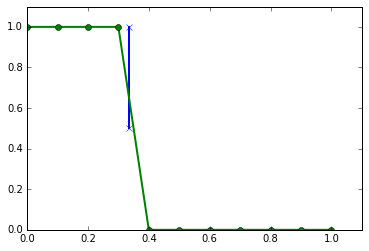

In [3]:
plt.xlim(0, 1.1) 
plt.ylim(0, 1.1)

A_raw_recalls    = np.array([1/3, 1/3])
A_raw_precisions = np.array([1/1, 1/2])
dump(A_raw_precisions, A_raw_recalls)

A_interp_precisions = eleven_point_interpolated_precisions(A_raw_precisions, A_raw_recalls)
line, = plt.plot(A_raw_recalls, A_raw_precisions, 'x-', linewidth=2)
line2, = plt.plot([float(i)/10.0 for i in range(11)], A_interp_precisions, 'o-', linewidth=2)

plt.show()



*Step 3*: We do the averaging across the two queries. 

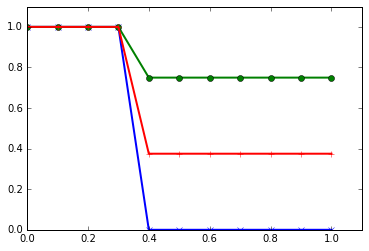

In [4]:
A_interp_precisions = eleven_point_interpolated_precisions(A_raw_precisions, A_raw_recalls)
B_interp_precisions = eleven_point_interpolated_precisions(B_raw_precisions, B_raw_recalls)

# put them into one matrix
mat = np.hstack((A_interp_precisions,B_interp_precisions)).reshape(2, 11)
avg_precisions = np.mean(mat, axis = 0)
#print(mat)
#print(avg_precisions)

plt.xlim(0, 1.1) 
plt.ylim(0, 1.1)

line,  = plt.plot([float(i)/10.0 for i in range(11)], A_interp_precisions, 'x-', linewidth=2)
line2, = plt.plot([float(i)/10.0 for i in range(11)], B_interp_precisions, 'o-', linewidth=2)
line3, = plt.plot([float(i)/10.0 for i in range(11)], avg_precisions,      '+-', linewidth=2)

plt.show()

To summarize, we obtain the final plot (the red line) by
1. For each query, 
   1. Compute the raw precisions for each query at each position (in fact, one can calculate raw precisions *only* at the position where a relevant document is retrieved). 
   2. Obtain the interpolated precisions at each of the 11 points. 
2. Average the interpolated precisions across all queries, and plot the final line.  

**Answer 6**: Avg Prec (A) = (1/1) / 3 = 1/3; Avg Prec (B) = (1/1 + 2/3 + 3/4) / 3 = 29/36. 

The key part is that average precisions essentially only count precisions at positions where a relevant document is retrieved. This makes the result independent of how many documents are returned. 

For System A, we can deem precisions for the 2nd and 3rd relevant document as 0, as they are not returned. 

**Answer 7**: MAP = (1/3 + 29/36) / 2 = 41/72. 

**Answer 8**: R = 3, so R-precision = Prec @ 3. For System B, it is 2/3.